In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("Downloads/dataset/marketing_campaign.csv", delimiter="\t")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# There are 28 columns which are of similar type
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
len(data)

2240

## Data Engineering

In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# Fill the values in Income with the median value
data["Income"].fillna(data["Income"].median(), inplace=True)

In [12]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
## Drop the ID, Z_CostContact and the Z_Revenue columns
data.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [14]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [15]:
data["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [16]:
data["Education"] = data["Education"].replace(["Graduation", "PhD", "Master", "2n Cycle"], "Post-Graduate")
data["Education"] = data["Education"].replace("Basic", "Under-Graduate")

In [17]:
data["Education"].value_counts()

Education
Post-Graduate     2186
Under-Graduate      54
Name: count, dtype: int64

Unique Values in the Education columns is Education
Post-Graduate     2186
Under-Graduate      54
Name: count, dtype: int64




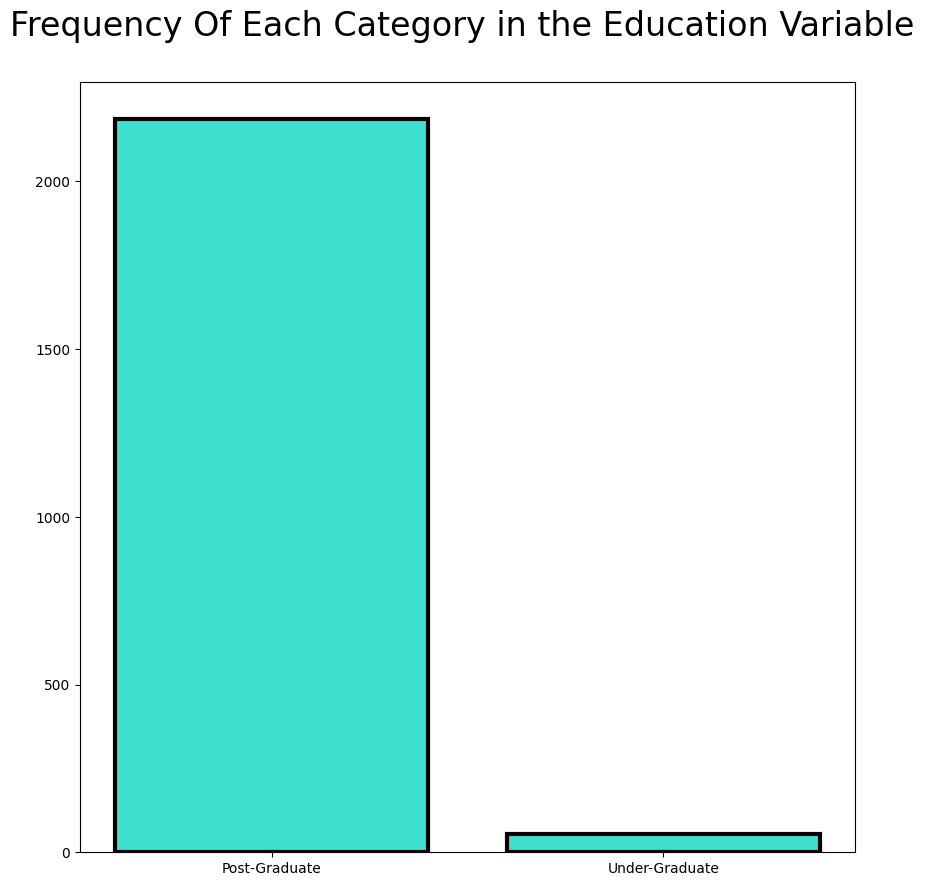

In [18]:
print(f"Unique Values in the Education columns is {data.Education.value_counts()}")
print("\n")

# Plotting the graph for the unique values
fig, ax = plt.subplots(figsize=(10, 10))
# Get the counts of unique values in the "Education" column
counts = data["Education"].value_counts()
# Create a bar plot
ax.bar(counts.index, counts.values, color="turquoise", edgecolor="black", linewidth=3)
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
fig.savefig("Documents/Customer Personality Analysis/")

In [19]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Post-Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Post-Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Post-Graduate,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Post-Graduate,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,Post-Graduate,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [20]:
# Changing the kidhome and teenhome
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids
0,1957,Post-Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,0
1,1954,Post-Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,2
2,1965,Post-Graduate,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,0
3,1984,Post-Graduate,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,1
4,1981,Post-Graduate,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,1


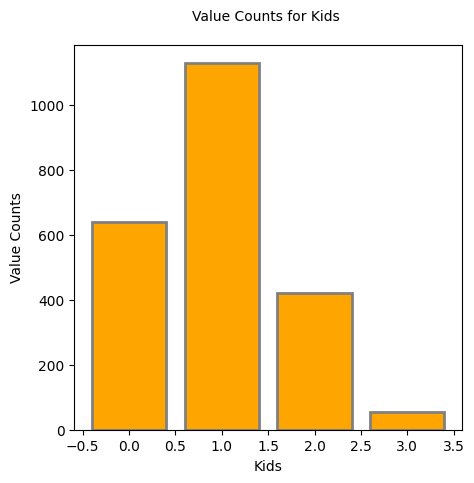

In [21]:
# Plotting the graph for the value counts of kids
fig, ax = plt.subplots(figsize=(5, 5))
counts = data.Kids.value_counts()
ax.bar(counts.index, counts.values, color="Orange", edgecolor="grey", linewidth=2)
plt.title("Value Counts for Kids \n", fontsize=10)
plt.xlabel("Kids")
plt.ylabel("Value Counts")
fig.savefig("Documents/Customer Personality Analysis/Images")

In [22]:
data["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [23]:
# Reduce the dimensonality
data["Marital_Status"] = data["Marital_Status"].replace(["Married", "Together"], "In-Relationship")
data["Marital_Status"] = data["Marital_Status"].replace(["Single", "Divorced", "Widow", "Alone", "Absurd", "YOLO"], "Single")
data.drop("Marital Status", axis=1, inplace=True)

KeyError: "['Marital Status'] not found in axis"

In [ ]:
data.head()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
counts = data.Marital_Status.value_counts()
ax.bar(counts.index, counts.values, color="gold", edgecolor="black", linewidth=2)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=10)
fig.savefig("Documents/Customer Personality Analysis/Images")

/tmp/ipykernel_4198/1351278601.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Income"],color = 'turquoise')


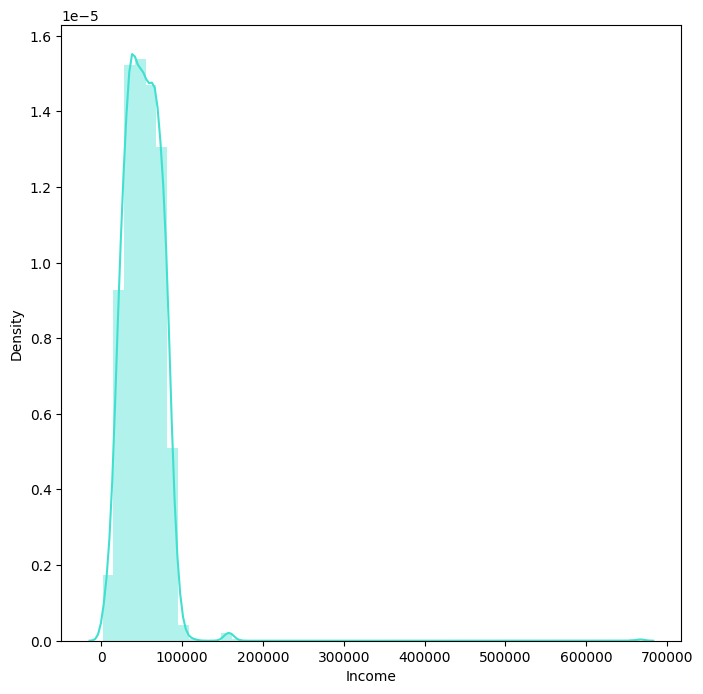

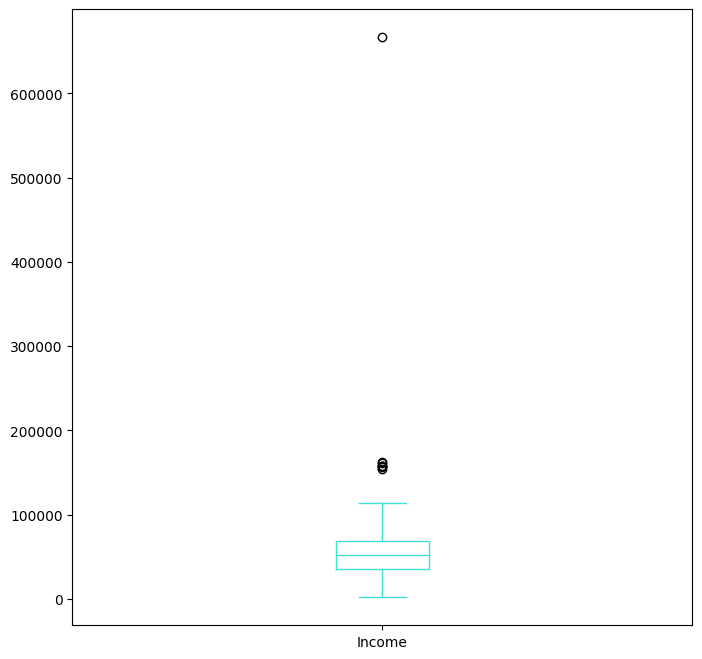

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(data["Income"],color = 'turquoise')
plt.show()
data["Income"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()
fig.savefig("Documents/Customer Personality Analysis/Images")

In [25]:
data["Expenses"] = data["MntFishProducts"] + data["MntFruits"] + data["MntGoldProds"] + data["MntMeatProducts"] + data["MntSweetProducts"] + data["MntWines"]

In [26]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses
0,1957,Post-Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,1,0,1617
1,1954,Post-Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,0,2,27
2,1965,Post-Graduate,In-Relationship,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,0,776
3,1984,Post-Graduate,In-Relationship,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,0,1,53
4,1981,Post-Graduate,In-Relationship,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,1,422


In [27]:
data.Expenses.value_counts()

Expenses
46      19
22      18
57      16
44      15
55      15
        ..
1345     1
764      1
368      1
292      1
843      1
Name: count, Length: 1054, dtype: int64

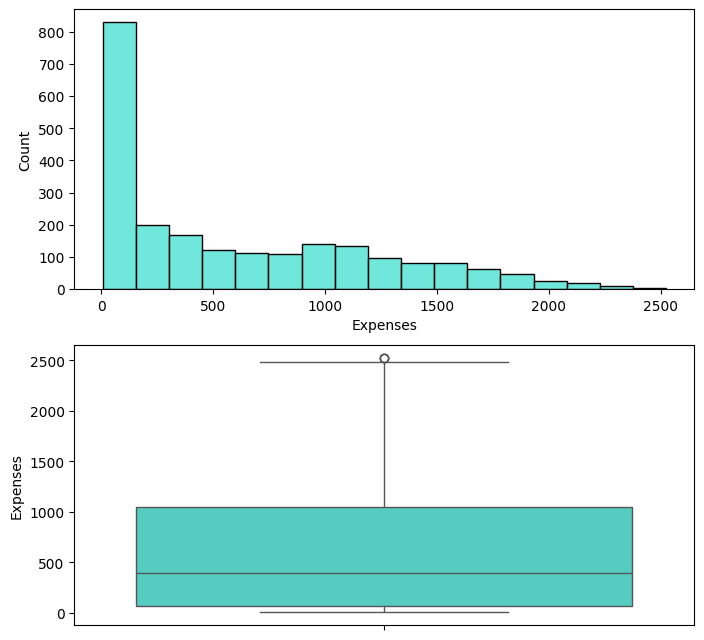

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Generate the histogram
sns.histplot(data["Expenses"], color='turquoise', ax=ax1)

# Generate the box plot
sns.boxplot(data["Expenses"], color='turquoise', ax=ax2)

# Display the figure
plt.show()

# Save the figure
fig.savefig("Documents/Customer Personality Analysis/Images/figure1.png")


In [29]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [30]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [31]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=col_del,axis=1)
data.sample(10)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
1112,1973,Post-Graduate,Single,54466.0,09-02-2014,78,0,0,2,16,0,4
2209,1963,Post-Graduate,Single,45146.0,15-07-2013,28,0,0,2,53,0,6
1345,1975,Post-Graduate,Single,33249.0,20-02-2013,11,0,0,1,112,0,8
1371,1960,Post-Graduate,In-Relationship,50523.0,25-12-2013,89,0,0,2,91,0,8
315,1956,Post-Graduate,In-Relationship,28839.0,11-03-2014,86,0,0,2,32,0,7
1084,1970,Post-Graduate,Single,75345.0,02-02-2013,16,0,1,0,2087,1,20
26,1976,Post-Graduate,In-Relationship,53359.0,27-05-2013,4,0,0,2,257,0,14
510,1981,Post-Graduate,In-Relationship,39665.0,25-05-2013,97,0,0,1,216,1,12
1091,1974,Post-Graduate,Single,39190.0,26-04-2014,91,0,0,1,133,0,9
878,1956,Post-Graduate,Single,86424.0,05-04-2014,12,0,0,0,1226,0,28


In [33]:
data.drop("Dt_Customer", axis=1, inplace=True)

In [34]:
data["Age"] = pd.Timestamp('now').year - data["Year_Birth"]

In [35]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,1957,Post-Graduate,Single,58138.0,58,0,1,0,1617,0,25,67
1,1954,Post-Graduate,Single,46344.0,38,0,0,2,27,0,6,70
2,1965,Post-Graduate,In-Relationship,71613.0,26,0,0,0,776,0,21,59
3,1984,Post-Graduate,In-Relationship,26646.0,26,0,0,1,53,0,8,40
4,1981,Post-Graduate,In-Relationship,58293.0,94,0,0,1,422,0,19,43


In [36]:
data.drop("Year_Birth", axis=1, inplace=True)

In [37]:
data.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,Post-Graduate,Single,58138.0,58,0,1,0,1617,0,25,67
1,Post-Graduate,Single,46344.0,38,0,0,2,27,0,6,70
2,Post-Graduate,In-Relationship,71613.0,26,0,0,0,776,0,21,59
3,Post-Graduate,In-Relationship,26646.0,26,0,0,1,53,0,8,40
4,Post-Graduate,In-Relationship,58293.0,94,0,0,1,422,0,19,43


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Recency            2240 non-null   int64  
 4   Complain           2240 non-null   int64  
 5   Response           2240 non-null   int64  
 6   Kids               2240 non-null   int64  
 7   Expenses           2240 non-null   int64  
 8   TotalAcceptedCmp   2240 non-null   int64  
 9   NumTotalPurchases  2240 non-null   int64  
 10  Age                2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Education
Marital_Status


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = le.fit_transform(data[label])
        print(label)

Education
Marital_Status


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   int64  
 1   Marital_Status     2240 non-null   int64  
 2   Income             2240 non-null   float64
 3   Recency            2240 non-null   int64  
 4   Complain           2240 non-null   int64  
 5   Response           2240 non-null   int64  
 6   Kids               2240 non-null   int64  
 7   Expenses           2240 non-null   int64  
 8   TotalAcceptedCmp   2240 non-null   int64  
 9   NumTotalPurchases  2240 non-null   int64  
 10  Age                2240 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 192.6 KB


In [42]:
data.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,0,1,58138.0,58,0,1,0,1617,0,25,67
1,0,1,46344.0,38,0,0,2,27,0,6,70
2,0,0,71613.0,26,0,0,0,776,0,21,59
3,0,0,26646.0,26,0,0,1,53,0,8,40
4,0,0,58293.0,94,0,0,1,422,0,19,43


In [46]:
data["Education"].head(30)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: Education, dtype: int64

In [45]:
data.Marital_Status.head(20)

0     1
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    0
15    1
16    0
17    0
18    0
19    1
Name: Marital_Status, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(data.values)
scaled_data = pd.DataFrame(scaled_feat, data.index, columns=data.columns)

In [48]:
data.values.shape

(2240, 11)

In [51]:
scaled_data.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,-0.157171,1.346874,0.235696,0.307039,-0.097282,2.388846,-1.264505,1.679417,-0.439037,1.320826,0.985345
1,-0.157171,1.346874,-0.235454,-0.383664,-0.097282,-0.418612,1.396361,-0.961275,-0.439037,-1.154596,1.235733
2,-0.157171,-0.742460,0.773999,-0.798086,-0.097282,-0.418612,-1.264505,0.282673,-0.439037,0.799685,0.317643
3,-0.157171,-0.742460,-1.022355,-0.798086,-0.097282,-0.418612,0.065928,-0.918094,-0.439037,-0.894025,-1.268149
4,-0.157171,-0.742460,0.241888,1.550305,-0.097282,-0.418612,0.065928,-0.305254,-0.439037,0.539114,-1.017761


In [54]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[24640.000000000004,
 19734.562373186032,
 17451.82037843461,
 15512.719279715993,
 13985.911833252652,
 12181.351069280325,
 11513.861988697005,
 10662.548724162774,
 9983.785146350921,
 9542.45167407209,
 8987.606222473278,
 8694.499606773552,
 8379.358298564346,
 7813.570646236165,
 7540.017063255126,
 7281.966876844813,
 7117.997384009247,
 6935.433196618169,
 6815.839348753351]

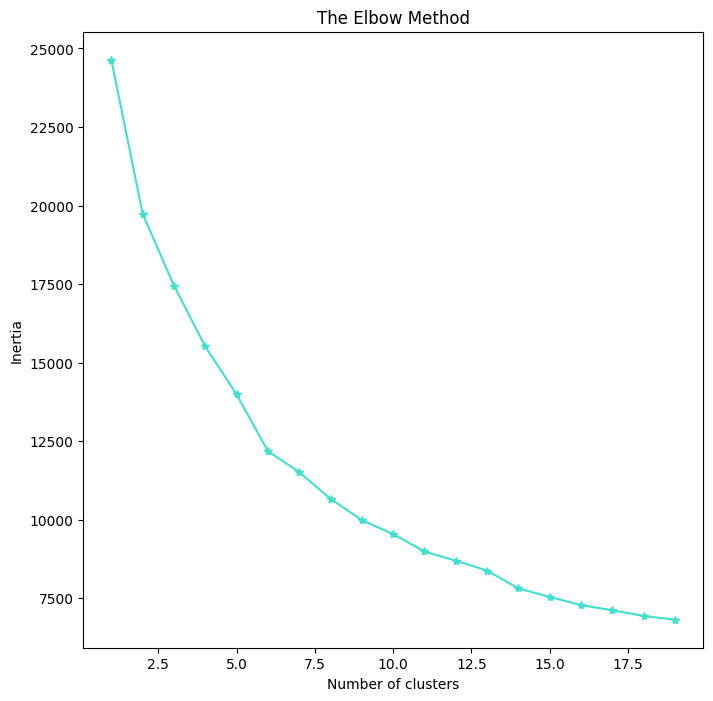

In [59]:
# Your previous plotting code
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(range(1, 20), inertia, color = "turquoise", marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Display the figure
plt.show()

# Save the figure
fig.savefig("Documents/Customer Personality Analysis/Images/figure.png")
